In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm 

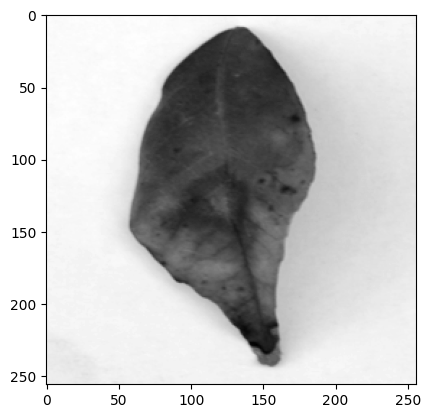

In [4]:
DATADIR = "/Users/trannhi/Downloads/Citrus_CNN/Citrus_Plant_Dataset/Citrus/Leaves"
CATEGORIES = ["BLACKSPOT", "CANKER", "GREENING", "HEALTHY", "MELANOSE"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
print(img_array)

[[214 215 214 ... 209 210 210]
 [215 215 215 ... 209 209 209]
 [215 214 214 ... 210 210 209]
 ...
 [204 204 204 ... 209 209 208]
 [205 205 205 ... 209 209 209]
 [205 204 204 ... 209 209 209]]


In [6]:
print(img_array.shape)

(256, 256)


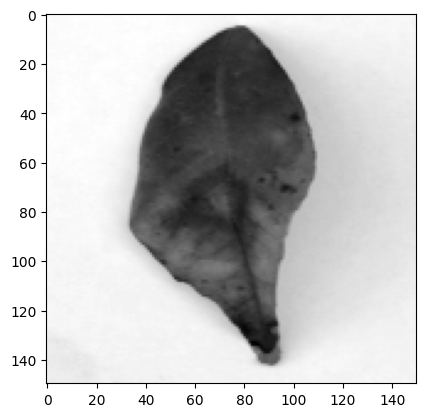

In [7]:
IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])
            except Exception as e:  
                pass

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 68.57it/s]

609


In [9]:
import random
random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

2
3
0
1
0
2
2
1
1
1


In [11]:
X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)
X= np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X.shape)

(609, 150, 150, 1)


In [12]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()